# 138. Copy List with Random Pointer

### Difficulty: <font color = orange> Medium </font>

---
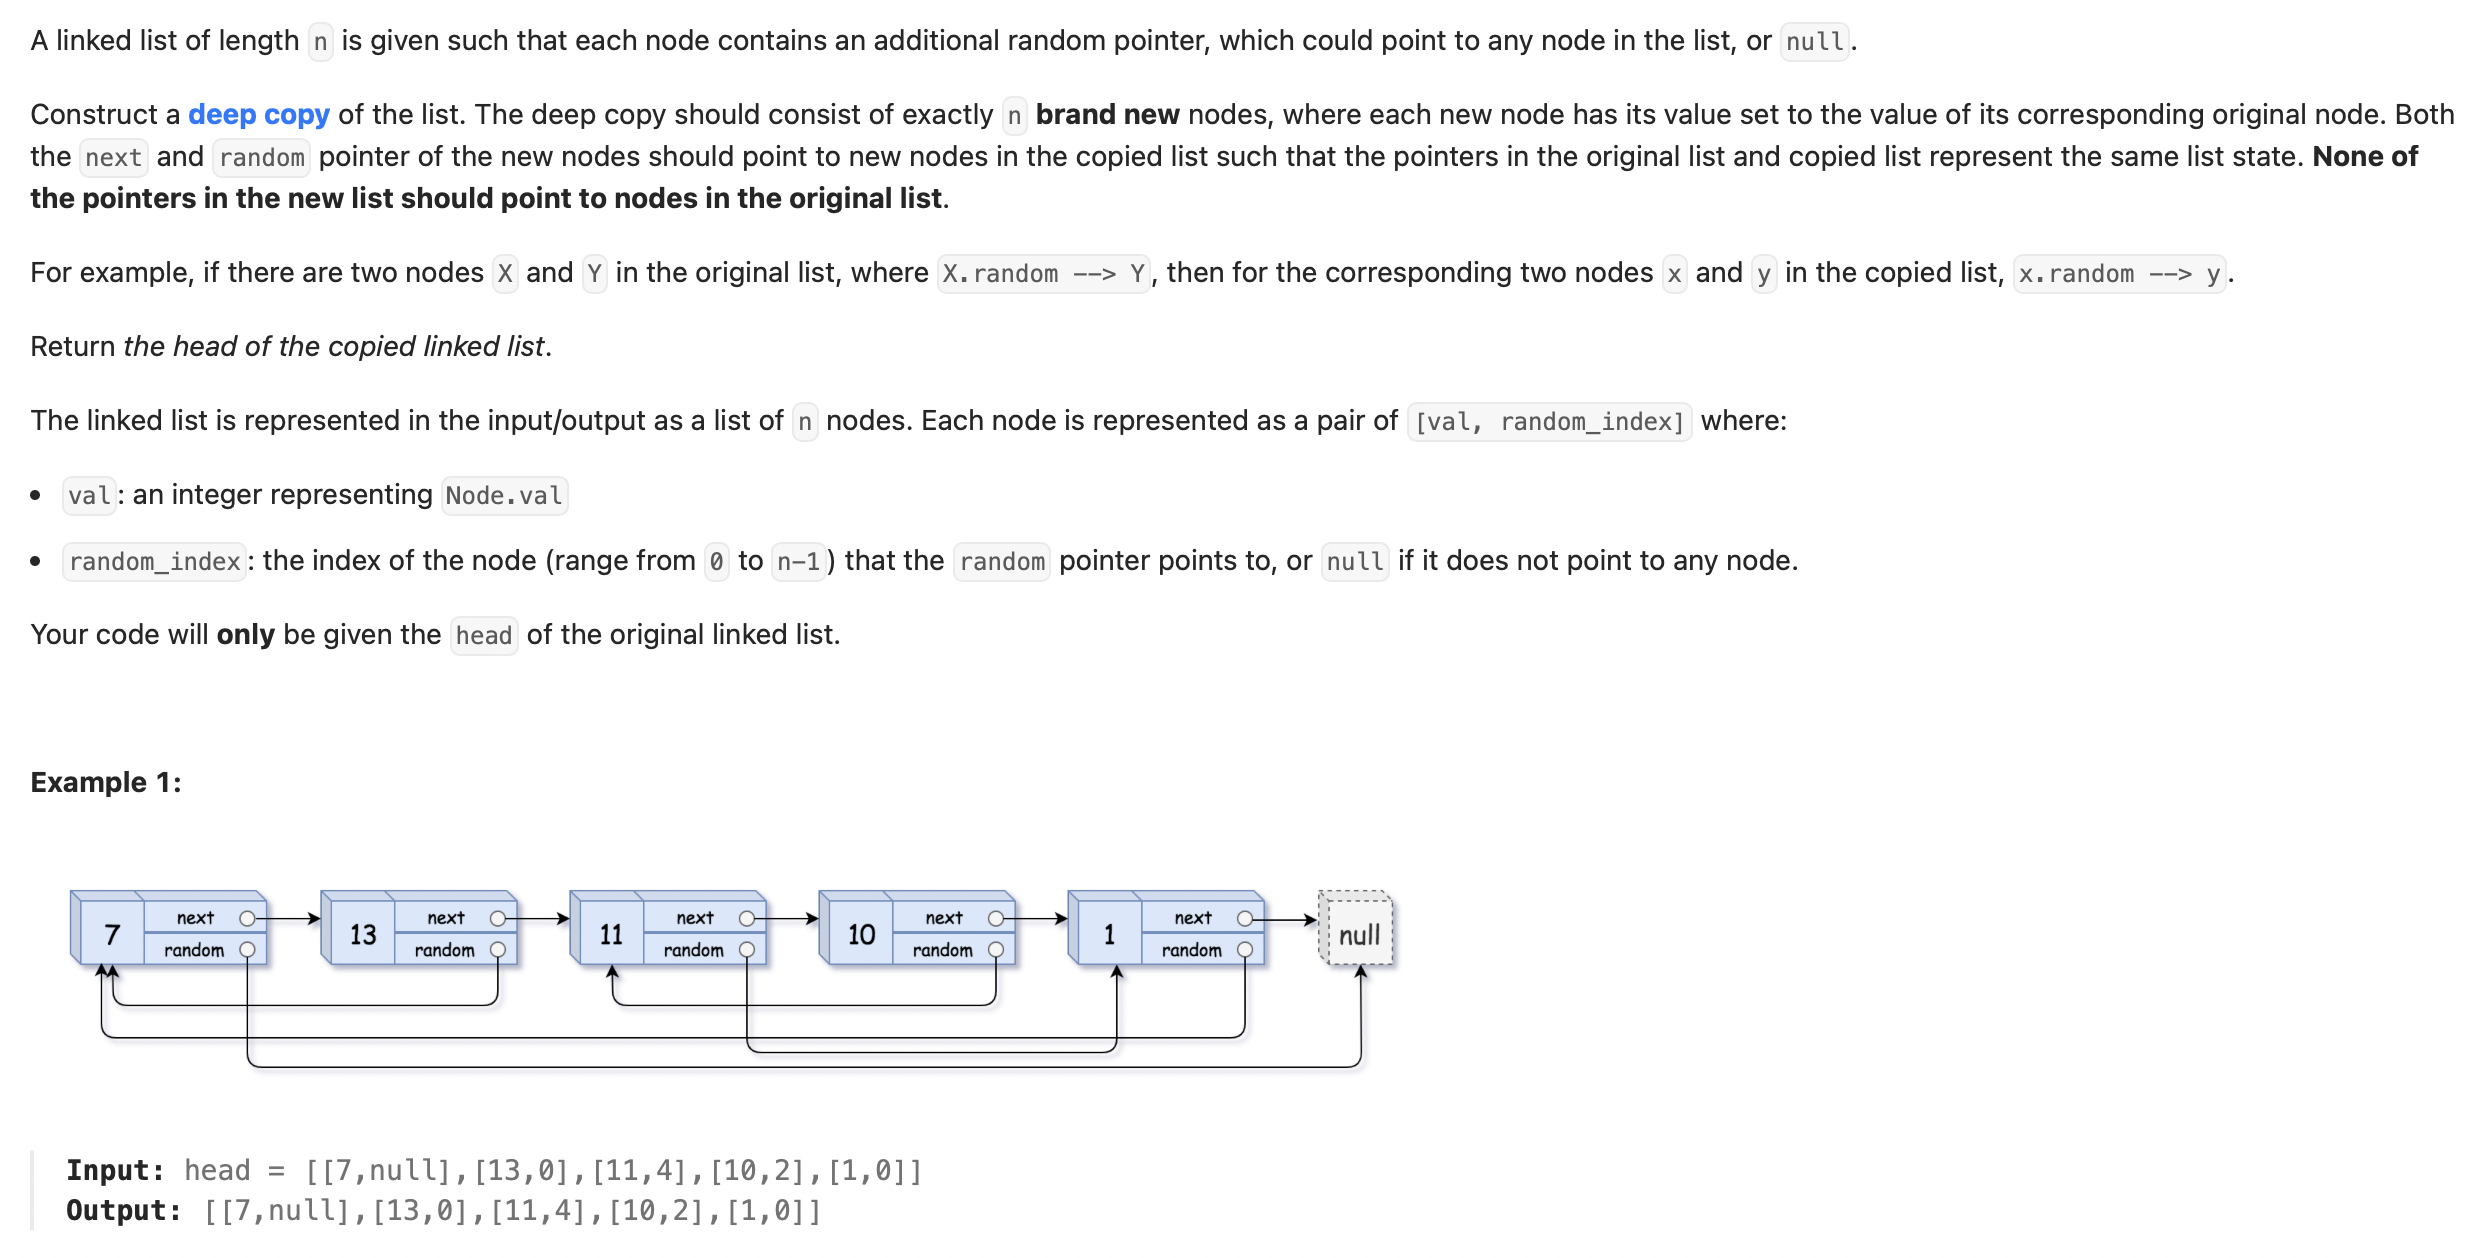

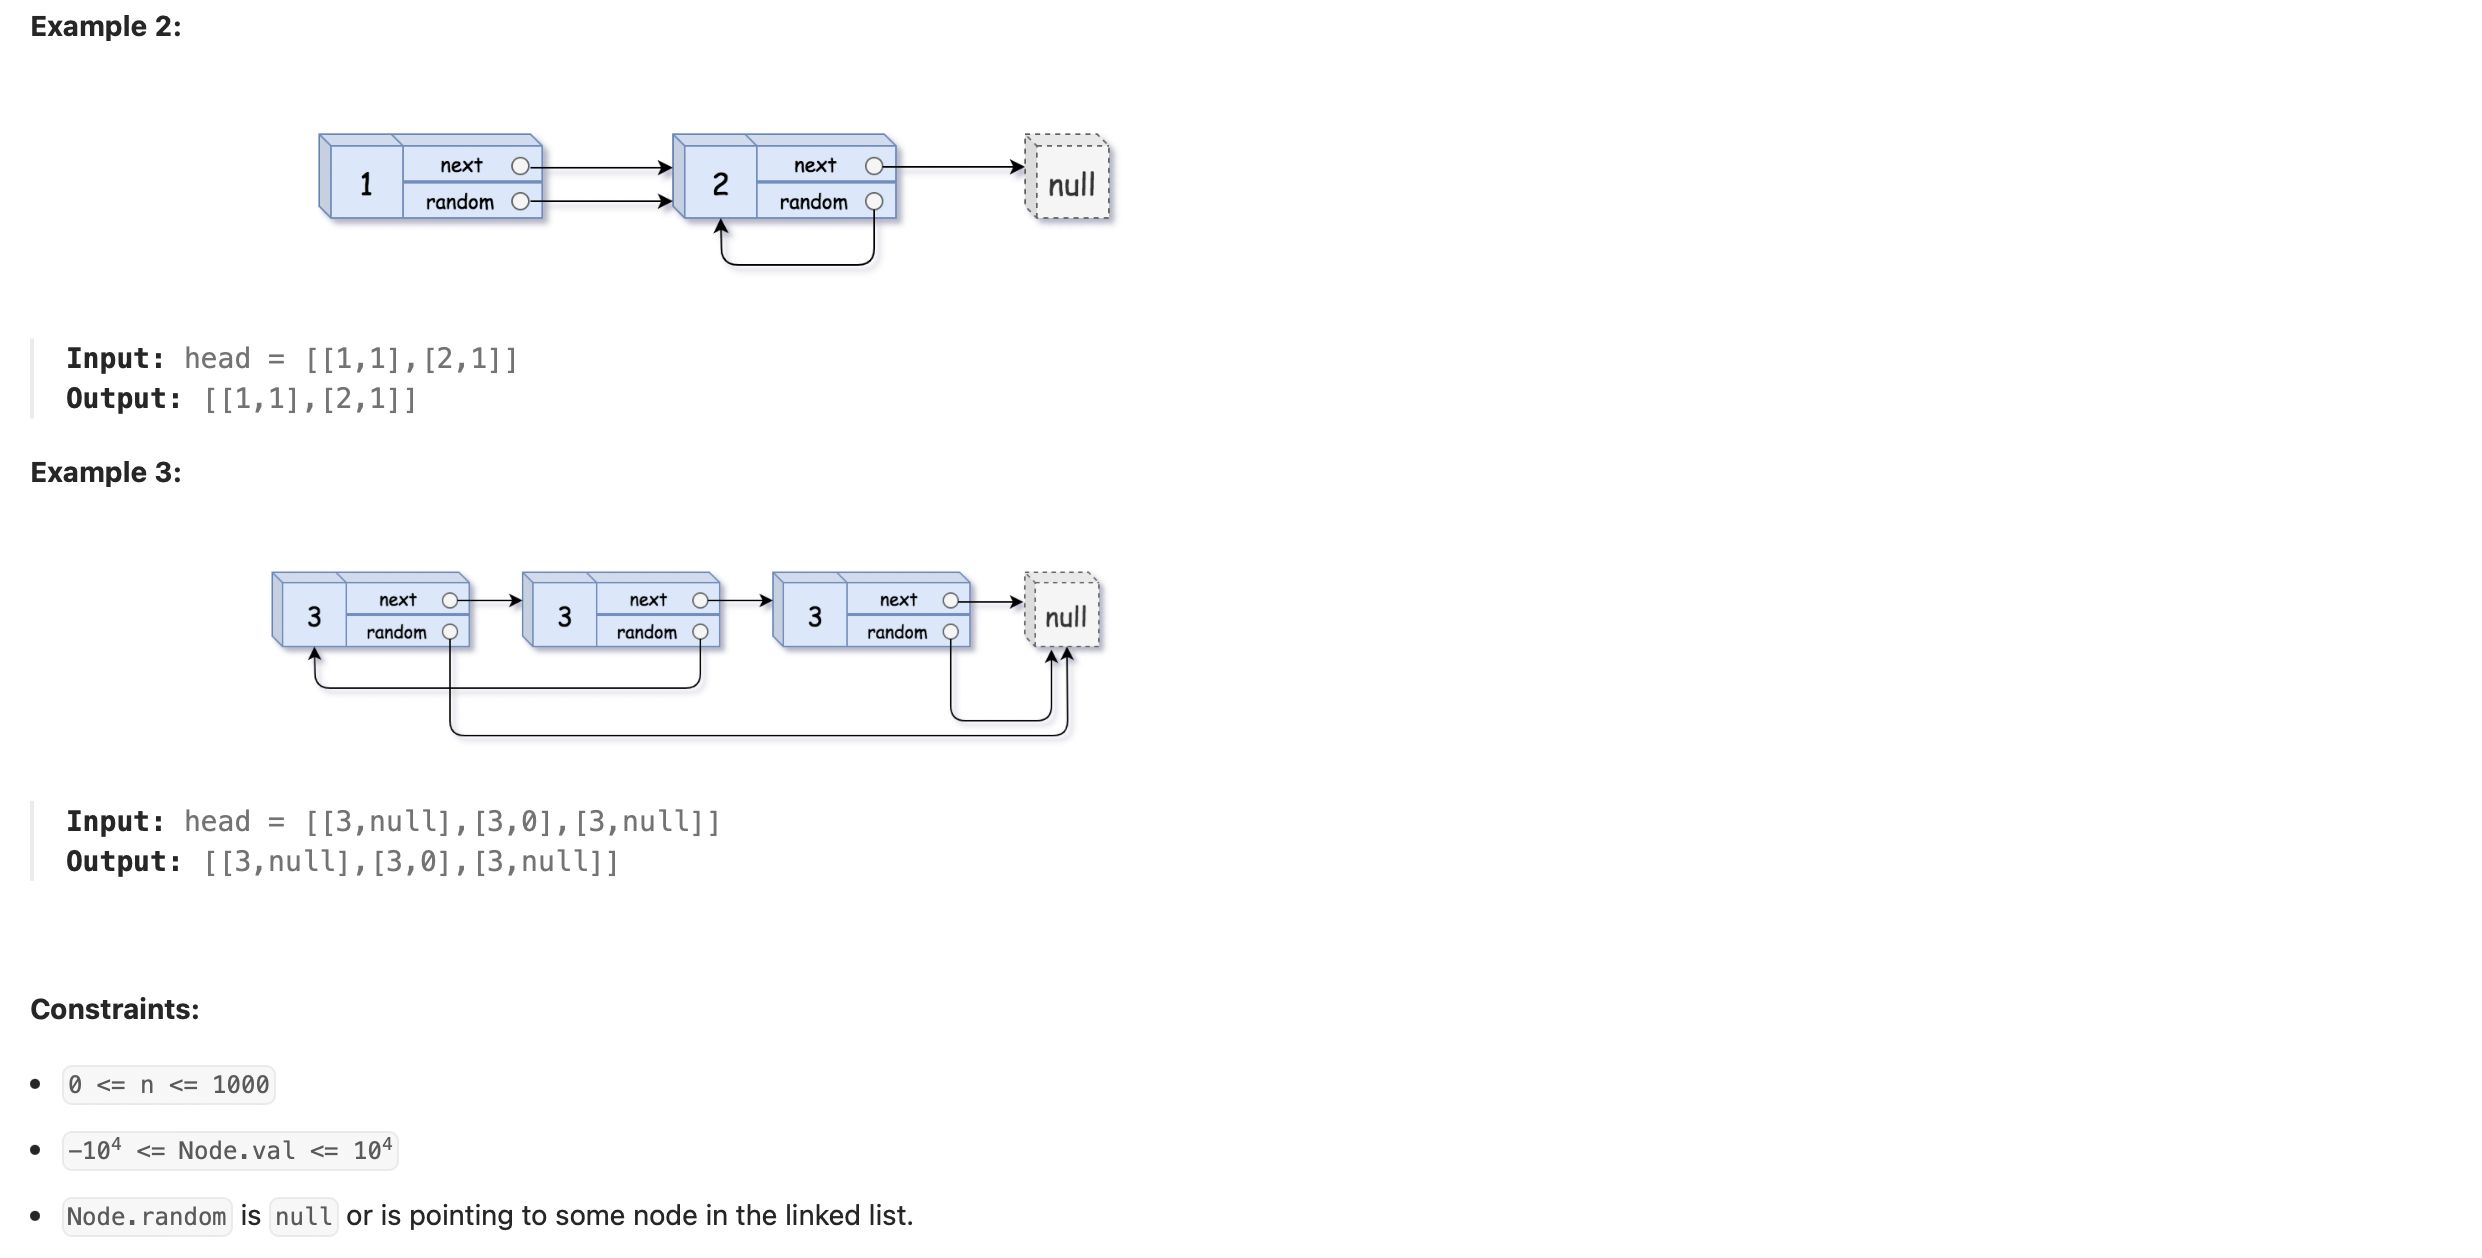

## Approach Overview:

Loop through the input list to create and store a copy of each node in a dictionary. Then loop through the input list again and link the **next** and **random** pointers of each copy node (in the dictionary) to the corresponding / correct nodes (in the dictionary).

GPT version:

First, loop through the input list to create and store a copy of each node in a dictionary, mapping each original node to its corresponding copy. Then, loop through the input list again to set the next and random pointers for each copied node by using the dictionary to link to the correct copied nodes.


## Detailed Explanation:

This was an interesting one (I know I say that about every LeetCode problem LOL). It was interesting because I learned about a novel technique: USING A DICTIONARY TO CLONE A LINKED LIST.

How does that work?

The dictionary essentially acts like a map -- it maps each node in the original input list to a copy node of it.

**For example:**

Say this is the original input list

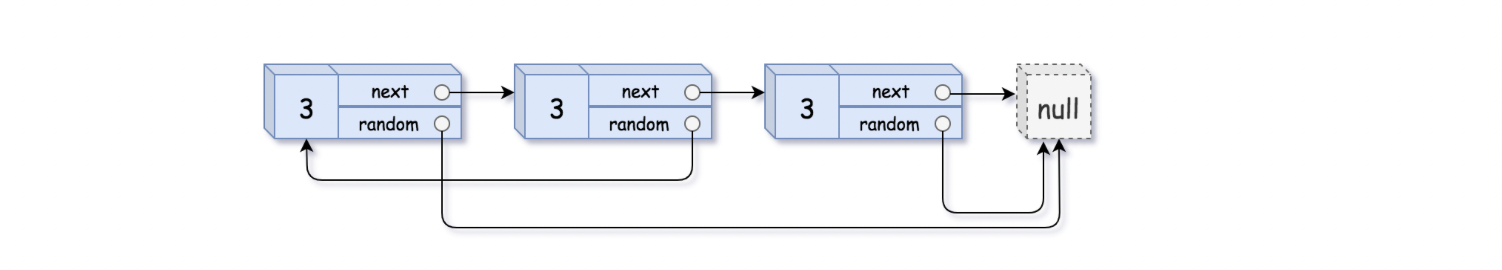

We then create a dictionary to store a copy of each node in the original list.

**Key points:** 

**1. The copy nodes are new nodes that are created from scratch (with the help of the Node class method).**

**2. The copy nodes initially ONLY store the VALUE of each node in the original list (so they're not initialized with next and random pointers at the start).** 

**In simpler (ChatGPT) words: The new nodes are created with only their **val** attribute set.**


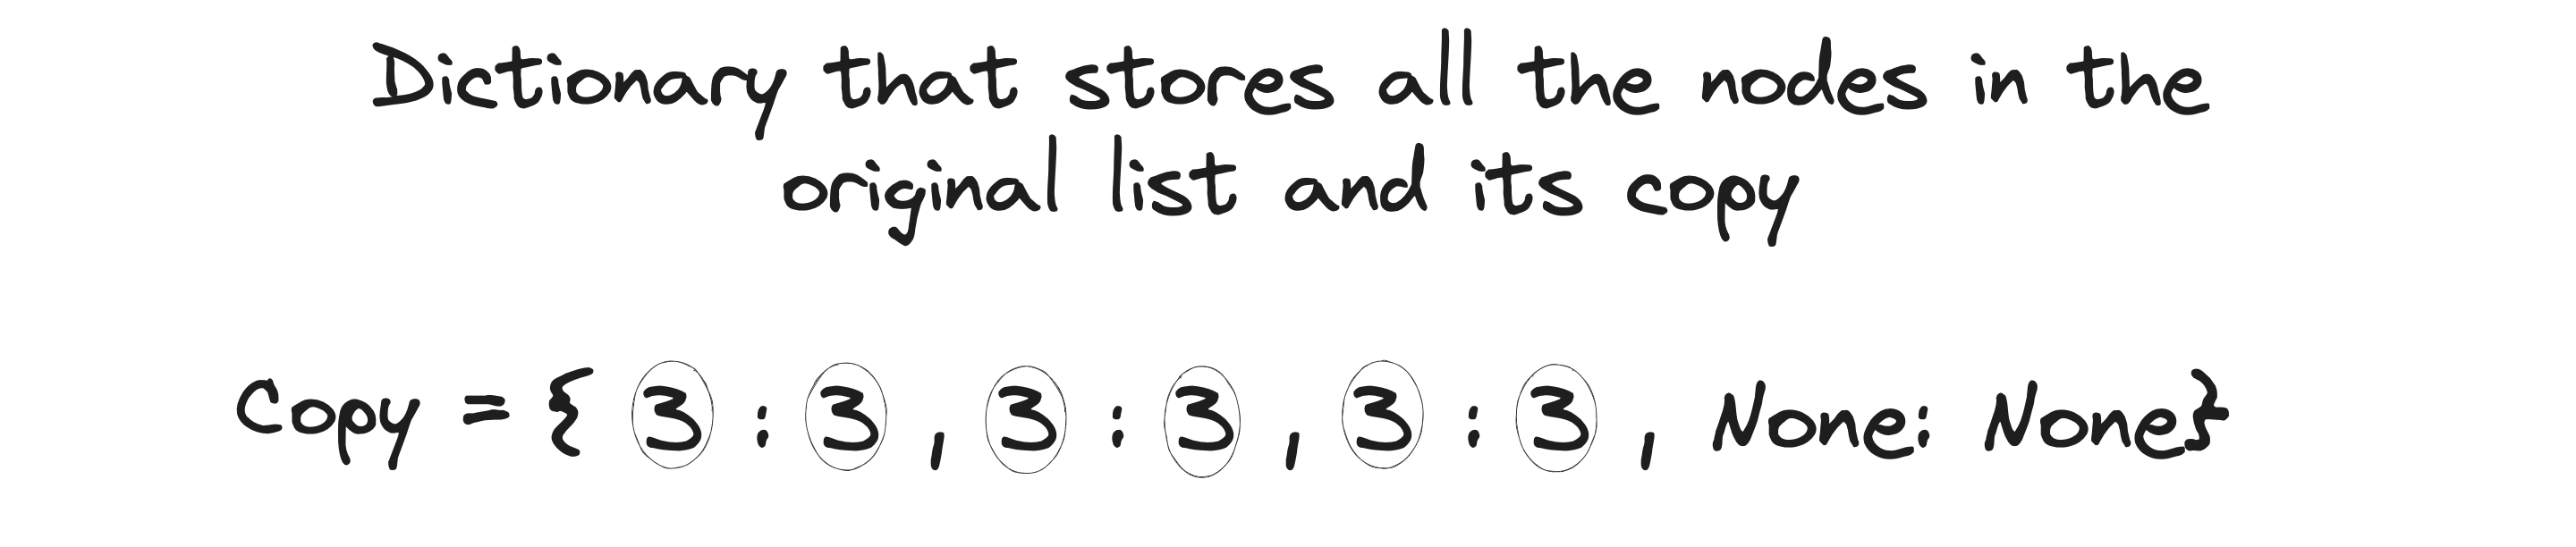

This dictionary makes it SUPER EASY for us to then link the copy nodes with their **next** and **random** pointers. 

In the next pass after we've created it and populated it with the original and copy nodes, that's exactly what we do.

We traverse through the original list again but this time we set the next and random pointers of each copy node by looking up the corresponding nodes in the dictionary.


## Key Challenges:

1. Everything, I didn't know what a deep copy even meant and let alone how to create it. In retrospect this problem was a lot easier and simpler than what the laboriously long description portrayed it to be.

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        # initialize current to the head of the list
        current = head

        # create a dictonary called copy to store a deep copy of each node in the input list 
        # we initialize it with None: None 
        # to help handle edge cases when a random pointer points to None
        copy = {None:None}
        
        # traverse the input list to create a copy of each node 
        while current:
            # create a copy of the current node in input list 
            # and store it in the dictionary with only the node's value initialized
            copy[current] = Node(current.val)
            # move on to the next node in the input list
            current = current.next

        # set current to the head of the input list (once again)
        current = head
        # set newHead to the copy head in the dictionary
        newHead = copy[current]
        # set newcurrent to the head of the list
        newcurrent = newHead 
        
        # traverse the input list to link the copy nodes in the dict with next and random pointers 
        while current:
            # set the next pointer of the current copy node to the correct node in the dictionary 
            newcurrent.next = copy[current.next]
            # set the random pointer of the current copy node to the correct node in the dictionary 
            newcurrent.random = copy[current.random]
            # move to the next node in the input list
            current = current.next
            # move to the next node in the copy list
            newcurrent = newcurrent.next
            
        # return the head of the (deep) copy list
        return newHead